

<html><img src="https://thinkingneuron.com/wp-content/uploads/2020/10/image-8.png" alt=""></html>

#### **Loading the data for regression**

In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
CarPricesDataNumeric=pd.read_pickle('../Datasets/CarPricesData.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


#### **Splitting the Data into Training and Testing**

In [2]:
CarPricesDataNumeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [3]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Sanity check with shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


### Installing the required libraries

In [4]:
!pip install tensorflow keras


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Creating Deep Learning- Artificial Neural Networks(ANN) model**

**Architecture of a Deep Learning ANN**

<html><img src="https://thinkingneuron.com/wp-content/uploads/2020/10/image-8.png" alt=""></html>

- Using **2 hidden layers** with **5 neurons** each and one output layer with one neuron.
    - Can change the number of hidden layers and the number of neurons in each layer.

- **Tuning of the model :** Choosing the combination that produces the best possible accuracy.

- Using **Sequential** module from the **Keras** library is used to create a sequence of ANN layers stacked one after the other.

- Each layer is defined using using the the **Dense** module of Keras, where we specify how many neurons would be there, which technique would be used to initialize the weights in the network.

In [5]:
# Importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# Creating the ANN model
model=Sequential()

# Defining the Input layer and First hidden layer, both same
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second Layer of the model
# Note: Don't need to specify input_dim as keras configures it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# Output neuron is a single fully connected node
# We will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the training set
model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)

Epoch 1/50


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0024  
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0064
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6524 
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4283
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2840
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2372
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2033
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1948
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2138
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1702
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1537
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1627
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1910
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1602
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1577
Epoch 16/50
51/51 ━━━━━━━━━

### **Hyperparameters tuning of ANN**

- Finding best values for `batch_size` and `epochs` is important as they affect the models performance, as bad values shows overfitting or underfitting.

- Apart from `epoch` and `batch_size`, we can also choose to tune the optimal number of neurons, the optimal number of layers, etc

- There is no fixed rule in selecting the number of layers/ number of neurons but choosing the best combination which produces the highest accuracy is important. Although,
    - Bigger the network, more computationally intensive it is, hence would take more time to run.
    - Thus finding the best accuracy with the minimum number of layers/neurons is important.

#### **Finding best set of parameters using manual grid search**

In [10]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    TrialNumber = 0

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            model = Sequential()
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
            model.add(Dense(1, kernel_initializer='normal'))

            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test).flatten()) / y_test))

            print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)

            new_row = pd.DataFrame([[TrialNumber, f"{batch_size_trial}-{epochs_trial}", 100 - MAPE]],
                                   columns=['TrialNumber', 'Parameters', 'Accuracy'])
            SearchResultsData = pd.concat([SearchResultsData, new_row], ignore_index=True)

    return SearchResultsData

######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -76.62076716826701


C:\Users\Dell\AppData\Local\Temp\ipykernel_7692\1535952041.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SearchResultsData = pd.concat([SearchResultsData, new_row], ignore_index=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: -69.62378834241446
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: -65.58134877566167
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -59.53056525748434
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: -70.67635310860467
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -72.1816935384663
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -61.28179187671486
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: -57.9743391284463
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: -65.05625775854145
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: -72.96836734658166
14/14

#### **Plotting the parameters trial results**

<Axes: xlabel='Parameters'>

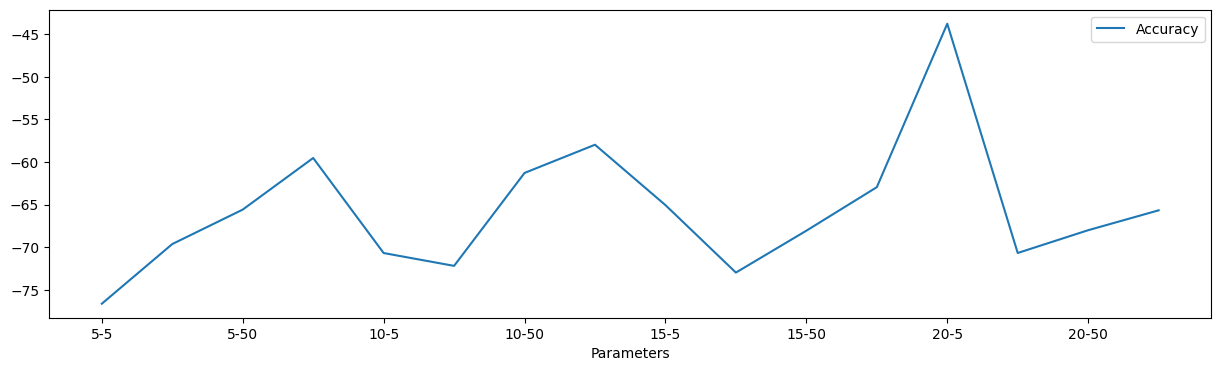

In [11]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Graph shows that best parameters are **batch_size=20** and **epochs=5**

#### **Training the ANN Model with the best parameters**

Training the model again and predicting the prices on testing data.

In [32]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=20, epochs=5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the prediction Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['PredictedPrice']=Predictions
TestingData['Price']=y_test_orig
TestingData.head()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Age,KM,Weight,HP,MetColor,CC,Doors,PredictedPrice,Price
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9919.907227,9950.0
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,10055.986328,7995.0
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,8414.733398,7500.0
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9241.278320,9950.0
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8959.294922,8950.0


#### **Finding the accuracy of the model**

- Generating the prediction error for each row in testing data as the Absoulte Percentage Error.
    - **Mean Absoulte Percentage Error (MPAE)**, Taking the average for all the rows.

- The accuracy is calculates as 100-MPAE

In [33]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])

TestingData['APE']=APE

print('The accuracy of the ANN model is: ', 100-np.mean(APE))
TestingData.head()

The accuracy of the ANN model is:  90.99911292678573


,Age,KM,Weight,HP,MetColor,CC,Doors,PredictedPrice,Price,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9919.907227,9950.0,0.302440
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,10055.986328,7995.0,25.778441
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,8414.733398,7500.0,12.196445
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9241.278320,9950.0,7.122831
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8959.294922,8950.0,0.103854


#### **Why the accuracy comes different every time I train ANN**

- As ANN assigns random weights during initialization, thus every time we run the code, there are different values that get assigned to each neuron as weight and bias.
    - Thus final outcome also differ slightly

#### **Finding best hyperparameters using GridSearchCV**

- **Grid Search Cross Validation** helps find the best parameters of the ANN

In [42]:
from keras.models import Sequential
from keras.layers import Dense

# Function to generate deep ANN
def make_regression_ann(Optimizer_trial='adam'):
    model=Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

########################################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Listing all the parameters to try
Parameters_Trials={
    'batch_size': [10,20,30],
    'epochs': [10,20],
    'model__Optimizer_trial': ['adam', 'rmsprop']
}

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)
########################################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def accuracy_Score(orig, pred):
    MAPE=np.mean(100*(np.abs(orig-pred)/orig))
    print('#'*70, 'Accuracy: ', 100-MAPE)
    return (100-MAPE)

custom_Scoring=make_scorer(accuracy_Score, greater_is_better=True)

# Creating the Grid Search space
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameters_Trials,
                         scoring=custom_Scoring,
                         cv=5)

########################################################
import time
StartTime=time.time()

# Running Grid Search for different parameters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best Parameters ###')
grid_search.best_params_

Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3662 
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2589
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1210
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0977
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0758
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0779
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0759
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0788
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0780
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0775
###################################################################### Accuracy:  38.22669169464419
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1173
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9834
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3848
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1677
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1269
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1322
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1223
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1141
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1147
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1234
###################################################################### Accuracy:  -127.43679990316588
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1972
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8551
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3272
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1576
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1567
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1464
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1322
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1204
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1247
###################################################################### Accuracy:  125.96570092498301
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1246 
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8809
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2512
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1506
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1348
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1323
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1636
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1394
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1198
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1231
###################################################################### Accuracy:  95.15424209875077
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0942
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9438
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5534
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2368
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1591
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1369
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1728
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1399
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1269
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1115
###################################################################### Accuracy:  128.4070050600135
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3653
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2274
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1476
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1123
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0906
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0834
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0837
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0825
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0901
###################################################################### Accuracy:  36.81452945094879
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3615
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1026
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9691
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7109
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7247
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6601
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6088
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6110
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5965
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6343
###################################################################### Accuracy:  -27.431161294898317
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2821
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8916
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5282
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3379
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2423
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1920
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1747
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1604
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1479
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1391
###################################################################### Accuracy:  115.580067141306
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0482
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1128
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8158
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5069
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3247
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2314
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1854
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1735
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1505
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1539
###################################################################### Accuracy:  77.97780521923924
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0661
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9126
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6527
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3641
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2077
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1793
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1399
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1463
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1622
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1586
###################################################################### Accuracy:  128.5809113139863
Epoch 1/20


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3746 
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1666
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1243
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1025
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0997
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1065
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0847
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0936
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1014
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0912
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0936
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0919
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0930
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0862

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1576 
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0028
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5904
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4341
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2084
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1377
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1148
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1257
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1111
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1238
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1083
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1099
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1029
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0982
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1159

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1376 
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1627
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4549
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2552
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1693
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1235
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1252
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1212
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1085
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1225
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1106
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1237
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1271

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0532 
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8716
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6461
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3089
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2073
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1707
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1431
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1365
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1224
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1153
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1203
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1344
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1253
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1500
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1147

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2588
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0525
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5262
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1764
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1764
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1715
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1420
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1491
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1412
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1412
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1283
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1344
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1129
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1315


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3435
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2274
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1426
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1214
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0904
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0912
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0922
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0875
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0778
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0840
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0842
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0810


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1397 
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0580
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7824
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4425
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3241
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1830
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1316
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1270
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1182
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1262
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1212
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1025
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1749
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9632
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7862
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5004
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3480
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2198
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1775
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1482
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1432
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1325
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1165
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1229
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1350
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1282


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1256
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9779
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8573
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8326
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7119
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7523
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7780
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5723
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4683
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5298
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4434
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4600
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4561
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3722
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3984


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0125
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2692
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8454
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5329
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2729
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1623
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1694
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1618
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1248
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1210
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1355
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1169
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1303
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1208


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3715 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2964
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1668
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1562
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1442
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1180
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1175
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1002
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1021
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951
###################################################################### Accuracy:  11.280379513535067
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3003
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0882
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0426
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7212
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4224
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2423
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1423
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1509
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1184
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071
###################################################################### Accuracy:  -138.48717756570085
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0919 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0328
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9199
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5725
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2288
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1651
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1585
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1373
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1325
###################################################################### Accuracy:  126.621496019864
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9845
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1278
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7772
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4129
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3278
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2629
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2385
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2286
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2004
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1874
###################################################################### Accuracy:  98.95192894762941
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1658 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0409
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6898
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3823
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2139
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2019
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1353
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1492
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1441
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1546
###################################################################### Accuracy:  128.00130259755508
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3927 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2910
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2088
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1532
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1215
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1169
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1218
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1059
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0986
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1109
###################################################################### Accuracy:  15.855252123569315
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2224  
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1220
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9890
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0947
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7680
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8606
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8538
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7475
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6201
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7471
###################################################################### Accuracy:  -13.326908327559366
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1040 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1700
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0528
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9585
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8052
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7496
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4000
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2633
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2096
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1546
###################################################################### Accuracy:  129.67148708857766
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1105 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1707
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1900
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7892
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7723
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5544
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4287
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3169
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2614
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2249
###################################################################### Accuracy:  111.54731848730331
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0907 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1824
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7800
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6333
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3936
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2310
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1926
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1792
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1467
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1458
###################################################################### Accuracy:  128.42611812957827
Epoch 1/20


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3603 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3068
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1678
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1397
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1245
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1158
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1150
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1070
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1024
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1182
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1091
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0995
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0931
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0920
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0956
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1220 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1171
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0069
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5075
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1975
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1511
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1208
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1157
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1291
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1237
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1080
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1107
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1419
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1373
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1101
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1493 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3451
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9810
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7129
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5336
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2700
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2199
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1607
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1325
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1290
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1258
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1337
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1198
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1265
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1271
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0463 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1164
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1043
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0224
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8930
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7144
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7728
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8059
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8004
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5710
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6717
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7361
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5335
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5803
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5186
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0850 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9738
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7676
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5017
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2761
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1696
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1625
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1352
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1444
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1362
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1384
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1404
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1333
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1360
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1346
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3625 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3043
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1851
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1605
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1383
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1221
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1203
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0958
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0986
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0904
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0904
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0989
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0867
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1000
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0809
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2067  
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1833
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1761
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9138
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8012
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8346
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8867
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7301
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8077
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6052
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6373
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6770
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5549
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5237
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5449
Epoch 16/20
58/58 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1157 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0289
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9761
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8391
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6655
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5004
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3376
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2523
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2184
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1724
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1612
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1736
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1246
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1596
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1227
Epoch 16/20
58/58 ━━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2425  
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1924
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9754
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9126
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8664
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7647
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8025
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7837
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6204
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6756
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7291
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5668
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5295
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5849
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5599
Epoch 16/20
58/58 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1497  
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9991
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9514
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7247
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6046
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4639
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3331
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2365
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1918
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1765
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1627
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1468
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1323
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1623
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276
Epoch 16/20
58/58 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3587  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3432
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2595
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1805
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1514
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1300
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1318
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1167
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1200
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1089
###################################################################### Accuracy:  -1.975601536875189
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0811  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1624
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0872
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9698
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5906
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3162
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1912
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1679
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1248
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1202
###################################################################### Accuracy:  -161.36611624692517
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1233  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0650
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0026
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8710
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6799
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3848
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2619
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1901
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1643
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1549
###################################################################### Accuracy:  117.495071414198
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1285  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1105
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9995
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9358
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6664
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4039
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2432
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2164
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1662
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1765
###################################################################### Accuracy:  94.21085317267429
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9882  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0427
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9683
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8970
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4744
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2613
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2104
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1990
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1685
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1543
###################################################################### Accuracy:  129.80256662229567
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3439
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2762
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1829
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1403
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1463
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1230
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1212
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1069
###################################################################### Accuracy:  0.8492126272509211
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2602  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1841
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2539
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2128 
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9961
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1313
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2193
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9110
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8917
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9201
###################################################################### Accuracy:  -60.77245112468407
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2107  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2816
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1648
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0939
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9324
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8954
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6953
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6235
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5839
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4031
###################################################################### Accuracy:  132.08923193469911
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0349  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2367
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9495
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9619
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7212
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6430
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4778
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3380
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3300
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2581
###################################################################### Accuracy:  136.3216477096914
Epoch 1/10


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0288  
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9496
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1674
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9648
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8791
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7401
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4885
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4660
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3873
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2682
###################################################################### Accuracy:  131.496302290696
Epoch 1/20


c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3626  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3174
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2589
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2126
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1439
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1218
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1199
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1068
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1170
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1056
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1024
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1096
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1046
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1098
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1830  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2789
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0465
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7857
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5816
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4229
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2499
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2014
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1402
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1457
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1320
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1230
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1243
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1085
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1135
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2896  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0509
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9981
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8461
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6255
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4218
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2303
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1669
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1618
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1510
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1357
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1409
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1289
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1426
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1314
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0445  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0645
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0270
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8632
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6369
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3474
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2573
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1913
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1522
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1402
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1339
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1426
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1229
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1317
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1168
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2852  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2399
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9921
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8545
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9071
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7432
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7809
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8297
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8383
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6305
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6641
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5853
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6085
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5953
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6812
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3472  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2957
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2339
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1702
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1439
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1376
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1229
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1305
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1126
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1083
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1074
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0942
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0952
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2166  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1621
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0818
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1585
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9511
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8642
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6656
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5733
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4196
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2469
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2050
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1585
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1424
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1428
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1390
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1139  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2452
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2251
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1077
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0972
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9335
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6827
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6222
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4608
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3046
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2098
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1630
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1515
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1419
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1284
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2381  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0328
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9377
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7860
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6279
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4876
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3616
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2942
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2415
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2154
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2074
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1837
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1560
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1461
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1412
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9896  
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1573
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0076
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8159
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8432
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5887
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4617
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3960
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3625
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2861
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2200
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1863
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1572
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1594
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1330
Epoch 16/20
39/39 ━━━━━━━━━━

c:\Users\Dell\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9705 
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9455
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6624
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4064
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2131
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1490
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1389
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1307
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1250
########## Total Time Taken:  4 Minutes
### Printing Best Parameters ###


{'batch_size': 20, 'epochs': 10, 'model__Optimizer_trial': 'rmsprop'}

In [43]:
print('### Printing Best Parameters ###')
grid_search.best_params_

### Printing Best Parameters ###


{'batch_size': 20, 'epochs': 10, 'model__Optimizer_trial': 'rmsprop'}

## **Conclusion:**

Deep Learning ANN regression model.